In [17]:
from tensorflow.keras.models import load_model
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model=load_model("unet.keras")

I0000 00:00:1728397032.278568   21638 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728397032.370289   21638 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728397032.371646   21638 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728397032.374060   21638 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [21]:
def preprocess_and_load_mask(name):
    img_path=os.path.join("segmentation/Water Bodies Dataset/Images",name)
    mask_path=os.path.join("segmentation/Water Bodies Dataset/Masks",name)
    mask=plt.imread(mask_path)
    img=cv2.imread(img_path)
    img=cv2.resize(img,(128,128))
    mask=cv2.resize(mask,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img/255.0
    img = np.expand_dims(img, axis=0)
    return img,mask
    

# INPUT IMAGE

In [34]:
input_name="water_body_2.jpg"

In [35]:
img,mask=preprocess_and_load_mask(input_name)

In [36]:
img.shape

(1, 128, 128, 3)

In [37]:
mask.shape

(128, 128, 3)

# PREDICTION

In [38]:
y=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


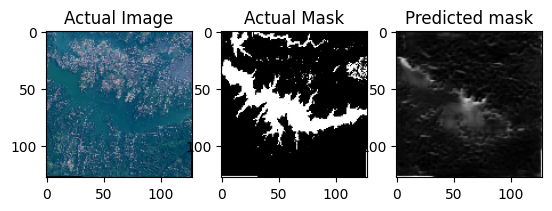

In [39]:
plt.subplot(1,3,1)
img_for_plotting=np.squeeze(img)
plt.title("Actual Image")
plt.imshow(img_for_plotting)
plt.subplot(1,3,2)
plt.title("Actual Mask")
plt.imshow(mask)
plt.subplot(1,3,3)
plt.title("Predicted mask")
plt.imshow(np.squeeze(y),cmap="gray")

In [30]:
y.shape

(1, 128, 128, 1)